In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif, SelectPercentile, SelectKBest
from sklearn.metrics import r2_score, mean_squared_error,f1_score

### Pre-processing

In [51]:
#loading train data csv and printing first 10 rows

df = pd.read_csv("/kaggle/input/stroke-prediction-by-123-of-ai-dec-2023/stroke_train_set.csv")
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked,0
2,Female,3.0,0,0,No,children,Rural,68.34,18.0,Unknown,0
3,Female,62.0,0,0,Yes,Private,Rural,226.38,47.4,never smoked,0
4,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0
5,Male,39.0,0,0,Yes,Private,Urban,164.67,33.8,Unknown,0
6,Female,47.0,0,0,Yes,Private,Rural,195.04,45.5,never smoked,0
7,Male,1.8,0,0,No,children,Urban,153.31,17.1,Unknown,0
8,Male,41.0,0,0,Yes,Private,Urban,104.34,30.3,Unknown,0
9,Female,47.0,0,0,Yes,Private,Urban,68.48,21.3,never smoked,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   object 
 1   age                4088 non-null   float64
 2   hypertension       4088 non-null   int64  
 3   heart_disease      4088 non-null   int64  
 4   ever_married       4088 non-null   object 
 5   work_type          4088 non-null   object 
 6   Residence_type     4088 non-null   object 
 7   avg_glucose_level  4088 non-null   float64
 8   bmi                3926 non-null   float64
 9   smoking_status     4088 non-null   object 
 10  stroke             4088 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 351.4+ KB


In [40]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  162
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#cleaning the null data

In [52]:
df.dropna(how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3926 entries, 0 to 4087
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3926 non-null   object 
 1   age                3926 non-null   float64
 2   hypertension       3926 non-null   int64  
 3   heart_disease      3926 non-null   int64  
 4   ever_married       3926 non-null   object 
 5   work_type          3926 non-null   object 
 6   Residence_type     3926 non-null   object 
 7   avg_glucose_level  3926 non-null   float64
 8   bmi                3926 non-null   float64
 9   smoking_status     3926 non-null   object 
 10  stroke             3926 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 368.1+ KB


In [53]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Plotting Categorical Features 

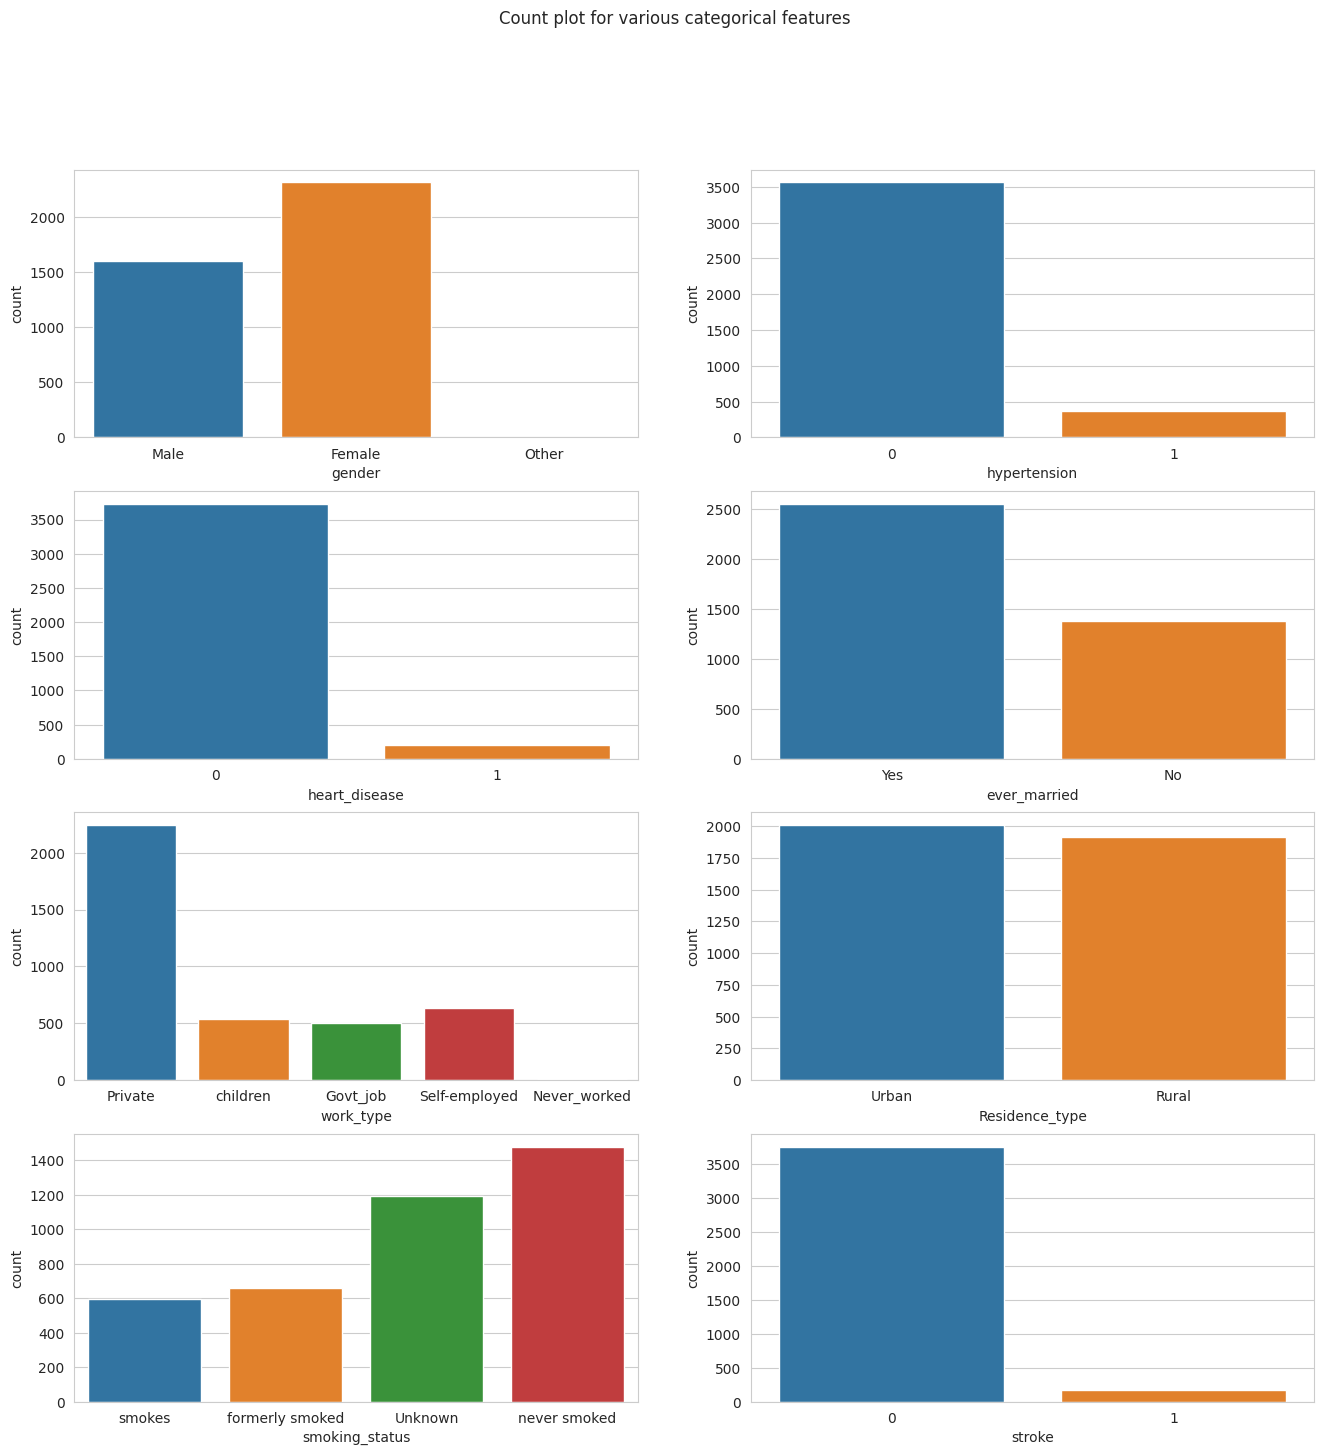

In [54]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

plt.show()

In [55]:
# Dropping 'Other' Gender from the gender feature
df[df['gender'] == 'Other']   

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1631,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [56]:
df.drop(1631, inplace=True)

In [57]:
#Converting Categorical Data to OneHot Encoding
df = pd.get_dummies(df)

In [58]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.272611,0.254139,0.237849,0.321577,0.225750,0.021802,-0.021802,-0.680680,0.680680,...,-0.071283,0.113862,0.320867,-0.633055,0.010086,-0.010086,-0.384513,0.237282,0.129615,0.070385
hypertension,0.272611,1.000000,0.129375,0.181690,0.171966,0.128008,-0.025714,0.025714,-0.156850,0.156850,...,-0.019100,0.001321,0.111380,-0.126681,0.001246,-0.001246,-0.143749,0.061043,0.078072,0.015119
heart_disease,0.254139,0.129375,1.000000,0.168036,0.050236,0.142814,-0.074306,0.074306,-0.106348,0.106348,...,-0.013680,0.003941,0.075292,-0.087314,-0.000562,0.000562,-0.069297,0.066497,-0.015913,0.041053
avg_glucose_level,0.237849,0.181690,0.168036,1.000000,0.185153,0.145343,-0.049529,0.049529,-0.156234,0.156234,...,-0.017842,0.010481,0.072622,-0.102909,0.007214,-0.007214,-0.111408,0.060346,0.043185,0.021548
bmi,0.321577,0.171966,0.050236,0.185153,1.000000,0.042206,0.017174,-0.017174,-0.327907,0.327907,...,-0.013637,0.205494,0.071287,-0.446934,0.008245,-0.008245,-0.262892,0.100012,0.105800,0.089842
stroke,0.225750,0.128008,0.142814,0.145343,0.042206,1.000000,0.002006,-0.002006,-0.110332,0.110332,...,-0.012652,0.007832,0.058043,-0.080244,-0.007686,0.007686,-0.071123,0.053008,0.009373,0.023260
gender_Female,0.021802,-0.025714,-0.074306,-0.049529,0.017174,0.002006,1.000000,-1.000000,-0.035246,0.035246,...,-0.011020,0.019393,0.027852,-0.076117,0.002976,-0.002976,-0.046627,-0.050951,0.096589,-0.017665
gender_Male,-0.021802,0.025714,0.074306,0.049529,-0.017174,-0.002006,-1.000000,1.000000,0.035246,-0.035246,...,0.011020,-0.019393,-0.027852,0.076117,-0.002976,0.002976,0.046627,0.050951,-0.096589,0.017665
ever_married_No,-0.680680,-0.156850,-0.106348,-0.156234,-0.327907,-0.110332,-0.035246,0.035246,1.000000,-1.000000,...,0.081523,-0.147302,-0.190723,0.540715,-0.001146,0.001146,0.330041,-0.177152,-0.100767,-0.102296
ever_married_Yes,0.680680,0.156850,0.106348,0.156234,0.327907,0.110332,0.035246,-0.035246,-1.000000,1.000000,...,-0.081523,0.147302,0.190723,-0.540715,0.001146,-0.001146,-0.330041,0.177152,0.100767,0.102296


<Axes: >

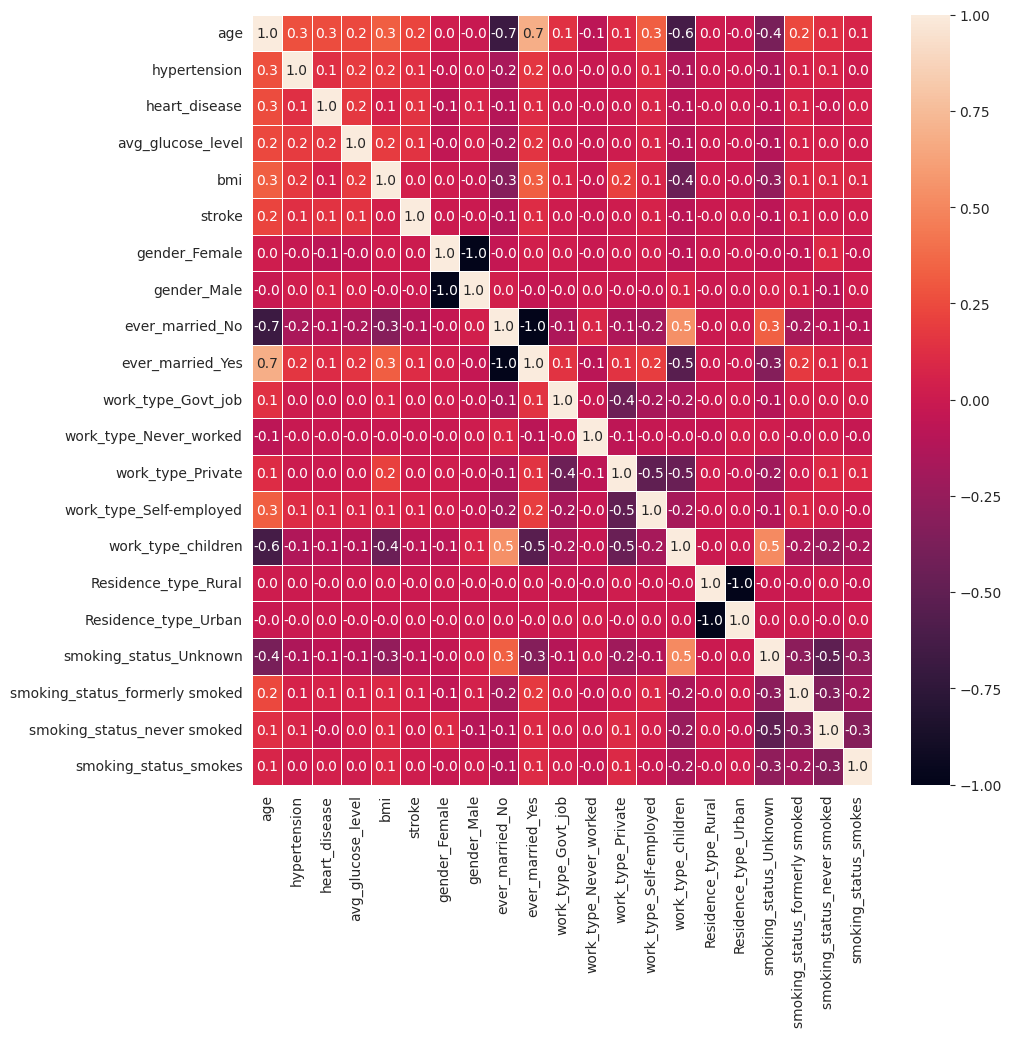

In [59]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


### Model Development

In [60]:
#Intializing input and output DataSets for Model
y = df['stroke']
X = df.drop(columns=['stroke'])
y.value_counts()

stroke
0    3757
1     168
Name: count, dtype: int64

In [61]:
# Output variable is highly imbalanced, using Smote to balance the data
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X, y)

In [62]:
y_train_sm.value_counts()

stroke
0    3757
1    3757
Name: count, dtype: int64

In [63]:
#normalizing the input columns
scaler = MinMaxScaler().fit_transform(X_train_sm)
X_train_sm = pd.DataFrame(scaler, columns=X_train_sm.columns)

In [64]:
#LogisticRegression , hypertuned with GridSearchCV
parameters = {
    'C' : [0.001],
    'solver' : ['saga']
}

lr = LogisticRegression(max_iter=1000)
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train_sm, y_train_sm)

lr_cv.fit(X_train_sm, y_train_sm)


print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)


Tuned hyper parameters :  {'C': 0.001, 'solver': 'saga'}
accuracy :  0.9225568036943649


In [65]:
#RandomForestClassifier , hypertuned with GridSearchCV

parameters = {
    'C' : [0.01],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train_sm, y_train_sm)

print(clf.best_params_)
print(clf.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/util

{'max_depth': 14, 'max_features': 5}
0.9759257160665212


In [66]:
#SVC , hypertuned with GridSearchCV

parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}




svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train_sm, y_train_sm)



print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 1.0, 'gamma': 100}
accuracy :  0.9707370668895372


In [67]:
#KNeighborsClassifier , hypertuned with GridSearchCV

parameters = {
    'n_neighbors' : list(np.arange(3, 20, 2)),
    'p' : [1, 2, 3, 4]
}


knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train_sm, y_train_sm)


print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': 5, 'p': 4}
accuracy :  0.9741968155933931


### Testing and Creating Output CSV

In [ ]:
# Creating output file for submission 

test_pd = pd.read_csv('/kaggle/input/stroke-prediction-by-123-of-ai-dec-2023/stroke_test_set_nogt.csv')

# saving in a new variable to modify
test = test_pd.copy(deep=True)

#Preprocessing
test.fillna(test['bmi'].mean(), inplace=True)

test.info()

test = pd.get_dummies(test)

#Normalization

scaler = MinMaxScaler().fit_transform(test)
X_input = pd.DataFrame(scaler, columns=test.columns)


#Predict and obtain results from the model
y_pred = lr_cv.predict(X_input)
print(y_pred)

# Save results to CSV
submission = pd.DataFrame({'ID': test_pd.index, 'stroke' : y_pred})
submission.to_csv('output_submission_eval.csv', index=False)